In [1]:
import dolfin as df
import ufl

mesh = df.UnitSquareMesh(40, 40)
# mesh = df.UnitSquareMesh.create(40, 40, df.CellType.Type.quadrilateral)

V = df.VectorElement("Lagrange", mesh.ufl_cell(), 2)
P = df.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
VP = df.MixedElement([V, P])
W = df.FunctionSpace(mesh, VP)

w = df.Function(W)
u, p = df.split(w)
v, q = df.TestFunctions(W)

def symgrad(u):
    return df.sym(df.nabla_grad(u))

def gamma(u):
    return df.sqrt(df.inner(symgrad(u), symgrad(u)))

def visc(u, beta):
    # Power-law fluid
    return gamma(u)**(beta-1.0)
    # return df.Constant(1.)*(1.0+0.000*ufl.min_value(df.sqrt(df.inner(symgrad(u), symgrad(u))), 1.))

def a(u, v):
    return 2*visc(u, 2.0)*df.inner(symgrad(u), symgrad(v))*df.dx

def a_lin(u, v):
    return 2*visc(u, 1.0)*df.inner(symgrad(u), symgrad(v))*df.dx

def b(v, p):
    return p*df.div(v)*df.dx

def nl(u, v, R):
    # return df.dot(u, df.nabla_grad(u))
    return R*df.inner(df.nabla_grad(u), df.outer(u, v))*df.dx

f = df.Constant((0., 0.))

A_lin = a_lin(u, v) + b(v, p) + b(u, q) #+ nl(u, v, 0.)
A = a(u, v) + b(v, p) + b(u, q) #+ nl(u, v, 0.)
L = df.dot(f, v)*df.dx

u0 = df.Constant((1., 0.))
noslip = df.Constant((0., 0.))

def top(x, on_boundary):
    return on_boundary and x[1] > 1.0-df.DOLFIN_EPS

def wall(x, on_boundary):
    return on_boundary and x[1] <= 1.0-df.DOLFIN_EPS

bc_top = df.DirichletBC(W.sub(0), u0, top)
bc_wall = df.DirichletBC(W.sub(0), noslip, wall)
bc_p = df.DirichletBC(W.sub(1), df.Constant(0.), "x[0] < DOLFIN_EPS && x[1] < DOLFIN_EPS", "pointwise")
bcs = [bc_top, bc_wall, bc_p]

# Initial guess
F_lin = A_lin - L
df.solve(F_lin == 0, w, bcs)

# Actual problem
F = A-L
df.solve(F == 0, w, bcs)

No Jacobian form specified for nonlinear variational problem.Calling FFC just-in-time (JIT) compiler, this may take some time.

Differentiating residual form F to obtain Jacobian J = F'.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 2.329e+01 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.133e-13 (tol = 1.000e-10) r (rel) = 9.157e-15 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.
Calling FFC just-in-time (JIT) compiler, this may take some time.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 5.106e+01 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 3.240e+00 (tol = 

Object cannot be plotted directly, projecting to piecewise linears.


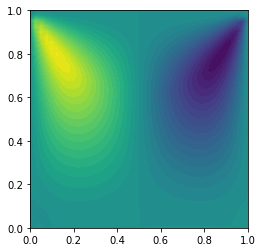

In [2]:
import matplotlib.pyplot as plt
df.plot(u[1])

#gradu = 1 + (df.sqrt(df.inner(symgrad(u), symgrad(u)))**(-1) + 0.5**(-1))**(-1)
#fig = df.plot(gradu)
#plt.colorbar(fig)

Object cannot be plotted directly, projecting to piecewise linears.
Calling FFC just-in-time (JIT) compiler, this may take some time.


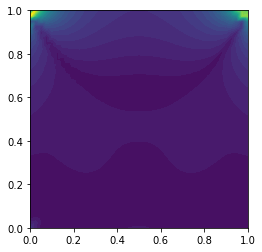

In [3]:
df.plot(gamma(u))
plt.show()